# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("/content/drive/MyDrive/ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


In [ ]:
print(testFaces.shape, testLabels.shape)

(40, 112, 92) (40,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def principalComponentAnalysis(X): # Returns all the eigenvectors of covar matrix of X
    # your code here
    X = X.reshape(X.shape[0], -1)
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    covariance_matrix = np.cov(X_standardized, rowvar=False)
    print(covariance_matrix.shape)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # top_k_indices = np.argsort(eigenvalues)[::-1][:numComponents]
    # top_k_eigenvectors = eigenvectors[:, top_k_indices]
    return eigenvalues,eigenvectors

numComponents = 50
eigenvalues,eigenvectors = principalComponentAnalysis(trainFaces)
top_k_indices = np.argsort(eigenvalues)[::-1][:numComponents]
eigenfaces = eigenvectors[:, top_k_indices]
print(eigenfaces.shape)

(10304, 10304)
(10304, 50)


In [ ]:
# plot the eigen faces
%matplotlib inline
title_prefix = "Eigenface"
num_faces = eigenfaces.shape[1]
num_cols = 5  # Number of columns for subplots
num_rows = num_faces // num_cols + 1

plt.figure(figsize=(25, 20))
for i in range(num_faces):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(eigenfaces[:, i].reshape(112, 92), cmap='gray')
    plt.title(f"{title_prefix} {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """

    # your code here
    # scaler = StandardScaler()
    # test_face_standardized = scaler.fit_transform(testFace)
    weights = np.dot(testFace - meanFace, eigenFaces)
    # print(weights.shape)

    # Reconstructing the face
    reconstructed_face = meanFace + np.dot(weights, eigenFaces.T)
    return reconstructed_face

trainFaces_flatten = trainFaces.reshape(trainFaces.shape[0], -1)
meanFace = np.mean(trainFaces_flatten, axis=0)
testFaces_flatten = testFaces.reshape(testFaces.shape[0], -1)
reconstructed_faces = imageReconstruction(testFaces_flatten, eigenfaces, meanFace)

In [ ]:
reconstructed_faces.shape

(40, 10304)

In [ ]:
# plot recontructions here
%matplotlib inline
num_faces = testFaces.shape[0]
num_cols = 2  # Number of columns for subplots
num_rows = num_faces
reconstructed_faces = reconstructed_faces.reshape(num_faces, 112, 92)

plt.figure(figsize=(8, 4 * num_faces))
for i in range(num_faces):
    # Original test face
    plt.subplot(num_rows, num_cols, 2*i + 1)
    plt.imshow(testFaces[i], cmap='gray')
    plt.title("Original Face")
    plt.axis('off')

    # Reconstructed face
    plt.subplot(num_rows, num_cols, 2*i + 2)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.title("Reconstructed Face")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
%matplotlib inline

def displayNfactors(test_faces, eigenvectors, eigenvalues, mean_face, num_components_list):

    # your code here
    num_images = len(test_faces)
    num_factors = len(num_components_list)
    print(test_faces.shape)

    fig, axes = plt.subplots(num_images, num_factors, figsize=(10, 10))

    for i, test_face in enumerate(test_faces):
        for j, num_components in enumerate(num_components_list):
            top_k_indices = np.argsort(eigenvalues)[::-1][:numComponents]
            eigenfaces = eigenvectors[:, top_k_indices]
            reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)
            reconstructed_face = reconstructed_face.reshape(112, 92)
            # Plot the reconstructed face
            ax = axes[i, j] if num_images > 1 else axes[j]
            ax.imshow(reconstructed_face, cmap='gray')
            ax.set_title(f'{num_components} Factors')

            ax.axis('off')

    plt.tight_layout()
    plt.show()

    return None

displayNfactors(testFaces_flatten[:5], eigenvectors, eigenvalues, meanFace, [5, 10, 50, 100])

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
def getClass(test_image, eigenfaces, mean_face, X_train, y_train):
    min_dist = float('inf')
    best_prediction = None
    best_error_image = None
    scaler = StandardScaler()
    # X_train_normalized = scaler.fit_transform(X_train)
    # Project the test image onto the eigenfaces space
    test_face = test_image.reshape(1,-1)
    weights = np.dot(test_face - mean_face, eigenfaces)

    for i in range(len(X_train)):

        # Project the training image onto the eigenfaces space
        train_weights = np.dot(X_train[i] - mean_face, eigenfaces)

        # Calculate the Euclidean distance between the test and training image in the eigenfaces space
        dist = np.linalg.norm(weights - train_weights)

        # Update the minimum error and prediction
        if dist < min_dist:
            min_dist = dist
            best_prediction = y_train[i]
            best_error_image = X_train[i]

    return best_error_image, min_dist, best_prediction

def calculate_accuracy(test_faces, eigenfaces, mean_face, X_train, y_train):
    correct = 0
    total = len(test_faces)

    for i, test_face in enumerate(test_faces):
        _, _, prediction = getClass(test_face, eigenfaces, mean_face, X_train, y_train)
        if prediction == testLabels[i]:
            correct += 1

    accuracy = (correct / total) * 100
    return accuracy

accuracy = calculate_accuracy(testFaces_flatten, eigenfaces, meanFace, trainFaces_flatten, trainLabels) # For 50 components
print(accuracy)

100.0


Iterate through all the images in the test data and test the accuracy by taking different number of components

In [ ]:
components = [3,5,10,20,30,40,50]
mse = {}
accuracies = {}

for numComponents in components:
    top_k_indices = np.argsort(eigenvalues)[::-1][:numComponents]
    eigenfaces = eigenvectors[:, top_k_indices]
    trainFaces_flatten = trainFaces.reshape(trainFaces.shape[0], -1)
    meanFace = np.mean(trainFaces_flatten, axis=0)
    testFaces_flatten = testFaces.reshape(testFaces.shape[0], -1)
    reconstructed_faces = imageReconstruction(testFaces_flatten, eigenfaces, meanFace)
    reconstructed_faces = reconstructed_faces.reshape(num_faces, 112, 92)
    mse_components = np.mean((testFaces - reconstructed_faces) ** 2)
    mse[numComponents] = mse_components
    accuracy = calculate_accuracy(testFaces_flatten, eigenfaces, meanFace, trainFaces_flatten, trainLabels)
    accuracies[numComponents] = accuracy

print(mse)
print(accuracies)

{3: 971.9723844716218, 5: 824.6355978740606, 10: 676.964625399361, 20: 542.7532201426317, 30: 476.8132404418948, 40: 429.682554820574, 50: 399.2108655851619}
{3: 82.5, 5: 92.5, 10: 97.5, 20: 100.0, 30: 100.0, 40: 100.0, 50: 100.0}


Plot Number of eigenvectors vs Mean Square Error

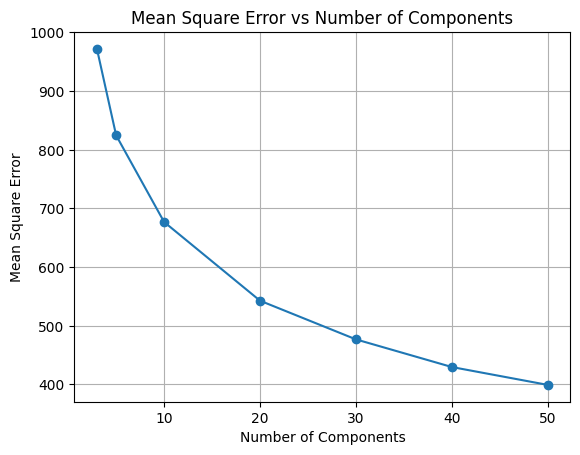

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mse.keys(), mse.values(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Number of Components')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

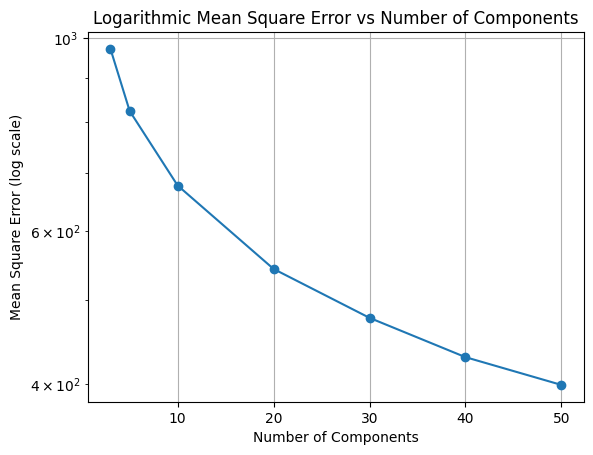

In [ ]:
plt.semilogy(mse.keys(), mse.values(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error (log scale)')
plt.title('Logarithmic Mean Square Error vs Number of Components')
plt.grid(True)
plt.show()

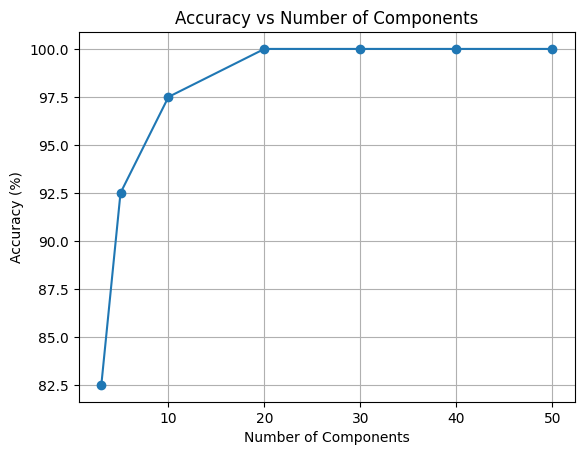

In [ ]:
plt.plot(accuracies.keys(), accuracies.values(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Components')
plt.grid(True)
plt.show()